###  **About the Dataset**

This dataset contains **time-series physiological signals** recorded from a **Photoplethysmogram (PPG) sensor**. PPG signals measure **blood volume changes**, commonly used for heart rate monitoring and detecting **cardiovascular conditions**.

The dataset is designed for a **binary classification task**, where each time window of recorded signals is labeled as either:  
✅ **Normal:** Represents a healthy physiological state.  
❌ **Myocardial Infarction (MI):** Indicates signs of a heart attack.

Each row in the dataset corresponds to a specific **time point** and contains multiple **PPG amplitude values** across different time steps. The final column (`Label`) serves as the **target variable**, determining whether the recorded signal belongs to a **normal** or **MI** condition.

This dataset is ideal for applying **machine learning and deep learning models** to **classify heart conditions**, making it valuable for **medical signal processing** and **early heart disease detection**.

**Source:** [UCI Machine Learning Repository (Owner)](https://www.kaggle.com/datasets/ucimachinelearning/photoplethysmography-ppg-dataset?resource=download)  


In [64]:
import pandas as pd

# Load the dataset (Replace 'file.csv' with actual file path)
df = pd.read_csv("/content/PPG_Dataset.csv")

# Display dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Columns: 2001 entries, 0 to Label
dtypes: float64(2000), object(1)
memory usage: 39.3+ MB
None


In [65]:
# Check unique label distribution
print(df["Label"].value_counts())

Label
MI        1294
Normal    1282
Name: count, dtype: int64


In [66]:
# Check first few rows
print(df.head())

          0         1         2         3         4         5         6  \
0 -0.015552  0.016963  0.013575  0.027204  0.068154  0.129259  0.127915   
1  0.002323  0.002754  0.022539  0.228807  0.107751  0.034439  0.086007   
2  0.050481 -0.339781  0.265111  0.045092  0.040086  0.087173  0.092814   
3  0.023882  0.016561  0.248547  0.054567  0.128032  0.085954  0.107359   
4 -0.058591  0.171551  0.057262  0.270869  0.138357  0.078509  0.062504   

          7         8         9  ...      1991      1992      1993      1994  \
0  0.345174  0.197811  0.167651  ... -0.426464 -0.346976 -0.132168 -0.252098   
1  0.155667  0.163327  0.223759  ... -0.169345 -0.356808 -0.338996 -0.292489   
2  0.099586 -0.143305  0.164186  ... -0.401426 -0.402333 -0.373426 -0.303710   
3  0.207137  0.174547 -0.100118  ... -0.390700 -0.353882 -0.294014 -0.267005   
4  0.104447  0.134795  0.194248  ... -0.391598 -0.334490 -0.326873 -0.249881   

       1995      1996      1997      1998      1999  Label  
0 -0.24

Here we figure out that our datatype in lable is Object and we need to trnsfer it to numbers,  because the dataset contains non-numeric values (e.g., "MI" in the "Label" column). When we apply .mean(), .std(), and other numerical operations, Python expects only numeric values, but encounters a string ("MI").

In [67]:
print(df.dtypes)  # Check data types of all columns

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
1996     float64
1997     float64
1998     float64
1999     float64
Label     object
Length: 2001, dtype: object


## 📌 Phase 2: Visualizing PPG Signals  

### 🔍 Why Plot the PPG Signal?  
Before applying machine learning, it is crucial to **understand the raw data**. Plotting PPG signals helps us:  
- **Identify Trends:** Observe normal and abnormal patterns in heart activity.  
- **Detect Noise & Artifacts:** Spot irregularities that may affect model performance.  
- **Verify Data Quality:** Ensure the signal is well-structured for feature extraction and classification.  

### 📈 What This Plot Shows  
- The **x-axis** represents **time (samples)**  
- The **y-axis** represents **amplitude (signal strength)**  
- The red line shows the **PPG waveform**, which varies based on heart activity.  

By analyzing this visualization, we can prepare better features for classification and improve model accuracy.


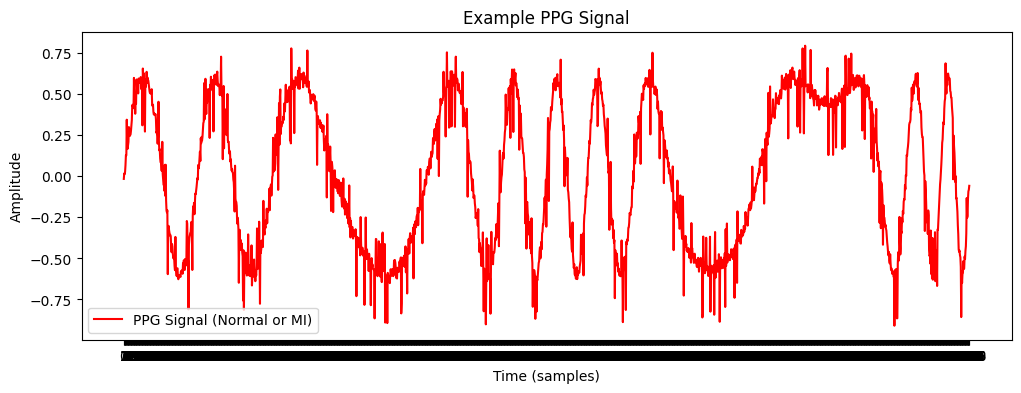

In [68]:
import matplotlib.pyplot as plt

# Plot a sample PPG signal (first row)
plt.figure(figsize=(12,4))
plt.plot(df.iloc[0, :-1], color="red", label="PPG Signal (Normal or MI)")
plt.title("Example PPG Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

## 📌 Phase 3: Filtering & Preprocessing

### 🔹 What Happened?
- We applied a **Butterworth low-pass filter** to remove noise from the **PPG signal**.
- The **raw signal (red)** contains useful data but also unwanted high-frequency noise.
- The **filtered signal (blue)** is smoother and preserves essential trends.

### 🔹 Why Use This Technique?
- **Removes high-frequency noise** for better signal clarity.
- **Improves accuracy** in feature extraction and classification.
- **Enhances biomedical analysis** by keeping relevant physiological patterns.

### 🔹 About the Filter:
- **Butterworth low-pass filter** (cutoff = 2.5Hz, order = 5) is used to smooth the signal while retaining important details.

✔ **Result**: A cleaner, more interpretable PPG signal for further processing. 🚀

### 🔹Why **Butterworth low-pass** filter and No **Kalman Filter**?
 In stationary condition, it is better to use filter like **Butterworth low-pass** or **Chebyshev Filter** a we are dealing  in a stationary condition (where signal properties remain constant over time), Butterworth is often preferred for biomedical signals like ECG & PPG due to its smooth, ripple-free response, ensuring minimal distortion. Chebyshev is useful when sharper filtering is required, but ripples can be tolerate

  Since non-stationary signals change over time, traditional fixed filters (like Butterworth) may not always work well. This is where adaptive filters like Kalman Filters or Wavelet Transforms help, as they adjust dynamically based on signal variations.

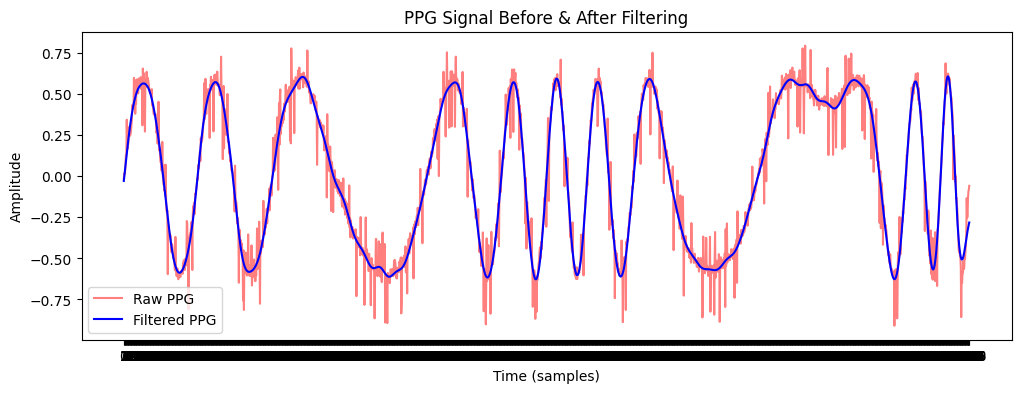

In [69]:
from scipy.signal import butter, filtfilt

# Define Butterworth filter
def butter_lowpass_filter(data, cutoff=2.5, fs=100, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Apply filter on first row
filtered_signal = butter_lowpass_filter(df.iloc[0, :-1])

# Plot filtered vs raw signal
plt.figure(figsize=(12,4))
plt.plot(df.iloc[0, :-1], alpha=0.5, label="Raw PPG", color="red")
plt.plot(filtered_signal, label="Filtered PPG", color="blue")
plt.title("PPG Signal Before & After Filtering")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


**📌 Phase 4: Extract Biomedical Features**

* Task: Compute Heart Rate (HR) & Variability (HRV).

* Purpose: Convert raw signals into ML-friendly features.

In [70]:
# Convert 'Label' column to numeric (0 = Normal, 1 = MI)
df["Label"] = df["Label"].map({"Normal": 0, "MI": 1})

# Verify conversion
print(df["Label"].unique())  # Should print [0, 1]

[1 0]


In [71]:
# Count occurrences of each label category
print("Label distribution:\n", df["Label"].value_counts())

Label distribution:
 Label
1    1294
0    1282
Name: count, dtype: int64


In [72]:
import numpy as np
from scipy.stats import skew, kurtosis

# Ensure we exclude 'Label' from numerical calculations
numerical_df = df.drop(columns=["Label"])

# Compute statistical features
df["Mean"] = numerical_df.mean(axis=1)
df["StdDev"] = numerical_df.std(axis=1)
df["Min"] = numerical_df.min(axis=1)
df["Max"] = numerical_df.max(axis=1)
df["Skewness"] = numerical_df.apply(skew, axis=1)
df["Kurtosis"] = numerical_df.apply(kurtosis, axis=1)

# Confirm new features
print(df[["Mean", "StdDev", "Min", "Max", "Skewness", "Kurtosis", "Label"]].head())

       Mean    StdDev       Min       Max  Skewness  Kurtosis  Label
0  0.015579  0.439120 -0.910115  0.795916 -0.089415 -1.427040      1
1  0.017504  0.437678 -0.930693  0.853141 -0.074331 -1.423461      1
2  0.014927  0.441587 -0.929915  0.828718 -0.076551 -1.397659      1
3  0.018500  0.441037 -0.946569  0.892738 -0.064739 -1.458610      1
4  0.014503  0.440254 -0.965543  0.865031 -0.048814 -1.431593      1


**📌 Phase 5: Train ML Model**

* Building a RandomForest classifier.

* Classify Normal vs. Myocardial Infarction conditions.

We need to split the dataset into:

Training Data (80%) → Used to train the machine learning model.

Testing Data (20%) → Used to evaluate model performance.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select features
X = df[["Mean", "StdDev", "Min", "Max", "Skewness", "Kurtosis"]]
y = df["Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
# Train classifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Model Accuracy: 96.32%


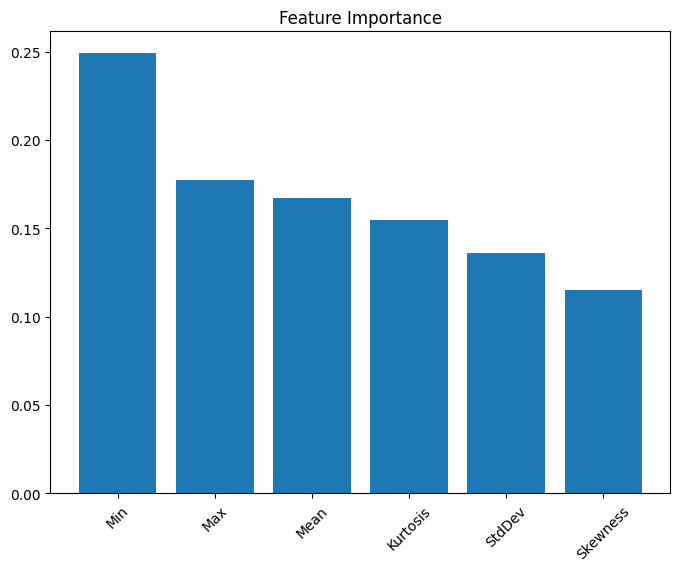

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores
importances = model.feature_importances_
feature_names = X.columns

# Sort and visualize important features
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.show()


**📌 Deep Learning (LSTM)**

📍 Task: Use LSTM for time-series classification.

📍 Purpose: Improve accuracy using sequence-based deep learning.

📍 Why LSTM?

✅ LSTMs are excellent for time-series data, as they learn temporal dependencies.

✅ Unlike RandomForest, which uses statistical features, LSTM learns directly from raw PPG sequences. (But it's not good for small Dataset like this and here i just want to see the difference)

✅ Can capture hidden patterns in signal variations better than traditional ML.(For larger Dataset)

**Data Preparation for LSTM**

Before using an LSTM, we need to reshape the data to match the expected input format for deep learning models.

🔹 LSTM Input Format: LSTMs expect data in this 3D format


* samples → Number of rows in the dataset
* time_steps → Number of time points per sequence (PPG signal length)
* features → 1 (single-channel PPG data)



In [24]:
# Load dataset
df = pd.read_csv("PPG_Dataset.csv")

# Separate features (PPG signals) and labels
X = df.iloc[:, :-1].values  # Take all columns except Label (raw time-series data)
y = df["Label"].map({"Normal": 0, "MI": 1}).values  # I convert labels to binary (0 or 1)

# Reshape into LSTM format (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Adding a single feature dimension

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print final shape
print(f"Training data shape: {X_train.shape}")  # (samples, time_steps, features)
print(f"Testing data shape: {X_test.shape}")


Training data shape: (2060, 2000, 1)
Testing data shape: (516, 2000, 1)


 **Building and Training the LSTM Model**

 We define a LSTM model with:

* LSTM layers → Learn sequential dependencies
* Dropout layers → Prevent overfitting
* Dense (Fully Connected) layer → Make predictions

And we train the model on the PPG time-series dataset.

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import AdamW

# Define the model
model = Sequential(name="Bi_LSTM_Regularized")

# First Bi-LSTM Layer
model.add(Bidirectional(
    LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.005))
))
model.add(Dropout(rate=0.4))  # to preserve learning

# Second LSTM Layer
model.add(LSTM(units=64, return_sequences=False, kernel_regularizer=l2(0.005)))
model.add(Dropout(rate=0.4))

# Fully Connected Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile Model
model.compile(loss="binary_crossentropy", optimizer=AdamW(learning_rate=0.001, weight_decay=1e-4), metrics=["accuracy"])


# Early Stopping Callback (Stops if validation loss doesn’t improve for 3 epochs)
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Train the LSTM model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 245ms/step - accuracy: 0.7028 - loss: 1.6077 - val_accuracy: 0.4981 - val_loss: 2.0190
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.8830 - loss: 0.8371 - val_accuracy: 0.9554 - val_loss: 0.4975
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.9614 - loss: 0.4525 - val_accuracy: 0.9554 - val_loss: 0.3830
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 254ms/step - accuracy: 0.9659 - loss: 0.3390 - val_accuracy: 0.9554 - val_loss: 0.3279
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.9616 - loss: 0.2971 - val_accuracy: 0.9554 - val_loss: 0.2965
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 240ms/step - accuracy: 0.9637 - loss: 0.2703 - val_accuracy: 0.9554 - val_loss: 0.2752
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.9704 - loss: 0.2234 - val_accuracy: 0.9554 - val_loss: 0.2590
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.9653 - loss: 0.2275 - val_accur

**Evaluate Model Performance**

In [34]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9564 - loss: 0.1903
Test Accuracy: 95.54%


**Visualizing Model Performance**

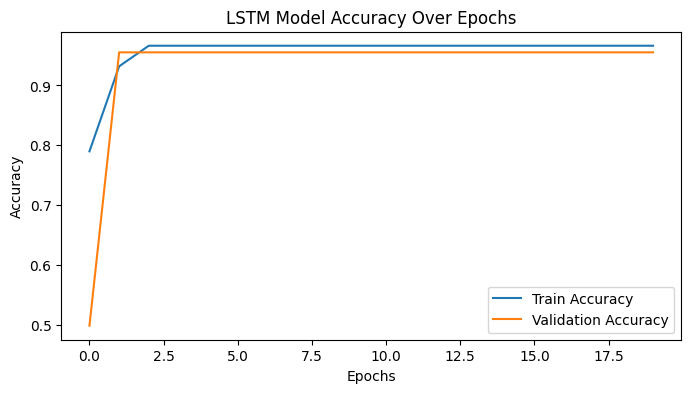

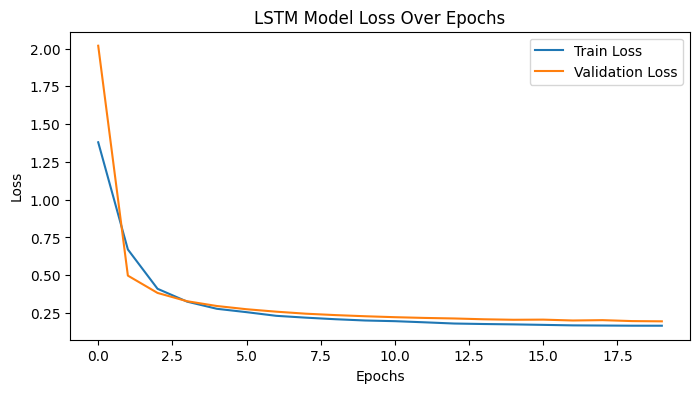

In [35]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM Model Accuracy Over Epochs")
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Model Loss Over Epochs")
plt.legend()
plt.show()

### **Model Evaluation**

 **Overview:**  
After training the **Bi-LSTM model**, we evaluate its performance by analyzing the **loss curve** and testing it on unseen data.

📊 **Loss Curve Analysis:**  
- The graph shows a steady **decrease in both training and validation loss**, indicating that the model is learning effectively.
- **Smooth convergence** tells that the model has not overfitted.

**Make Predictions on New Data**

In [39]:
# model predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert to binary output

# some example predictions
print("Predicted labels:", y_pred[:10].flatten())
print("Actual labels:", y_test[:10])

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Predicted labels: [0 0 0 0 0 0 0 1 1 0]
Actual labels: [1 0 0 0 0 0 0 1 1 0]


### **Predictions on New Data**


🔍 **Making Predictions:**  
- The trained model is used to predict labels for **new/unseen test data**.
- Predictions are generated using a **threshold of 0.5** (since it's a binary classification task).
- The predicted labels are compared to the actual labels to assess accuracy.

📈 **Result:**  
- Some predicted labels match the actual ones, while others do not, indicating possible misclassifications.(9/10 correct in 10 first samples for a quick view)
